In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Compute the sample mean and standard deviations for each feature (column)
# across the training examples (rows) from the data matrix X.
def mean_std(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return mean, std

In [3]:
# Standardize the features of the examples in X by subtracting their mean and
# dividing by their standard deviation, as provided in the parameters.
def standardize(X, mean, std):
    return (X - mean) / std

In [4]:
# Read data matrix X and labels t from text file.
def read_data(file_name):
    data = np.loadtxt(file_name)
    X = data[:, :-1]
    t = data[:, -1]
    return X, t

In [5]:

# Implement gradient descent algorithm to compute w = [w0, w1, ..].
def train(X, t, eta, epochs):
    costs = []
    ep = []
    w = np.zeros(X.shape[1])

    for epoch in range(epochs):
        # Compute gradient
        grad = compute_gradient(X, t, w)

        # Update weights
        w -= eta * grad

        # Compute cost
        if epoch % 10 == 0:
            cost = compute_cost(X, t, w)
            costs.append(cost)
            ep.append(epoch)

    return w, ep, costs

In [6]:
# Compute RMSE on dataset (X, t).
def compute_rmse(X, t, w):
    y_pred = np.dot(X, w)
    mse = np.mean((y_pred - t) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [7]:
# Compute objective function (cost) on dataset (X, t).
def compute_cost(X, t, w):
    N = len(t)
    y_pred = np.dot(X, w)
    error = y_pred - t
    cost = (1 / (2 * N)) * np.sum(error ** 2)
    return cost

In [8]:
# Compute gradient of the objective function (cost) on dataset (X, t).
def compute_gradient(X, t, w):
    N = len(t)
    y_pred = np.dot(X, w)
    error = y_pred - t
    grad = (1 / N) * np.dot(X.T, error)
    return grad

In [9]:
# BONUS: Implement stochastic gradient descent algorithm to compute w = [w0, w1, ..].
def train_SGD(X, t, eta, epochs):
    costs = []
    ep = []
    w = np.zeros(X.shape[1])

    for epoch in range(epochs):
        # Shuffle data
        idx = np.random.permutation(len(t))
        X_shuffled = X[idx]
        t_shuffled = t[idx]

        for i in range(len(t)):
            # Compute gradient for a single example
            grad = compute_gradient(X_shuffled[i:i+1], t_shuffled[i:i+1], w)
            # Update weights
            w -= eta * grad

        # Compute cost
        if epoch % 10 == 0:
            cost = compute_cost(X, t, w)
            costs.append(cost)
            ep.append(epoch)

    return w, ep, costs

In [10]:
##======================= Main program =======================##
if __name__ == "__main__":
    parser = argparse.ArgumentParser('Multiple Regression Exercise.')
    parser.add_argument('-i', '--input_data_dir',
                        type=str,
                        default='../content',
                        help='Directory for the multiple regression houses dataset.')
    FLAGS, unparsed = parser.parse_known_args()

    # Read the training and test data.
    Xtrain, ttrain = read_data(FLAGS.input_data_dir + "/multiple_train.txt")
    Xtest, ttest = read_data(FLAGS.input_data_dir + "/multiple_test.txt")

    # Compute mean and std for feature scaling
    mean, std = mean_std(Xtrain)

    # Standardize the training and test features
    Xtrain = np.column_stack((np.ones(len(Xtrain)), standardize(Xtrain, mean, std)))
    Xtest = np.column_stack((np.ones(len(Xtest)), standardize(Xtest, mean, std)))

    # Computing parameters for each training method for eta=0.1 and 200 epochs
    eta = 0.1
    epochs = 200
    w, eph, costs = train(Xtrain, ttrain, eta, epochs)
    w_sgd, eph_sgd, costs_sgd = train_SGD(Xtrain, ttrain, eta, epochs)

In [11]:
    # Print model parameters.
    print('Params GD: ', w)
    print('Params SGD: ', w_sgd)

Params GD:  [254449.99982048  78079.18106675  24442.5758378    2075.95636731]
Params SGD:  [244725.02784711  60796.05501517   5741.89896367  13680.33192678]


In [12]:
    # Print cost and RMSE on training data.
    print('Training RMSE (GD): %0.2f.' % compute_rmse(Xtrain, ttrain, w))
    print('Training cost (GD): %0.2f.' % compute_cost(Xtrain, ttrain, w))
    print('Training RMSE (SGD): %0.2f.' % compute_rmse(Xtrain, ttrain, w_sgd))
    print('Training cost (SGD): %0.2f.' % compute_cost(Xtrain, ttrain, w_sgd))

Training RMSE (GD): 61070.62.
Training cost (GD): 1864810304.94.
Training RMSE (SGD): 70742.51.
Training cost (SGD): 2502251097.92.


In [13]:
    # Print cost and RMSE on test data.
    print('Test RMSE (GD): %0.2f.' % compute_rmse(Xtest, ttest, w))
    print('Test cost (GD): %0.2f.' % compute_cost(Xtest, ttest, w))
    print('Test RMSE (SGD): %0.2f.' % compute_rmse(Xtest, ttest, w_sgd))
    print('Test cost (SGD): %0.2f.' % compute_cost(Xtest, ttest, w_sgd))

Test RMSE (GD): 58473.59.
Test cost (GD): 1709580288.69.
Test RMSE (SGD): 58474.67.
Test cost (SGD): 1709643410.39.


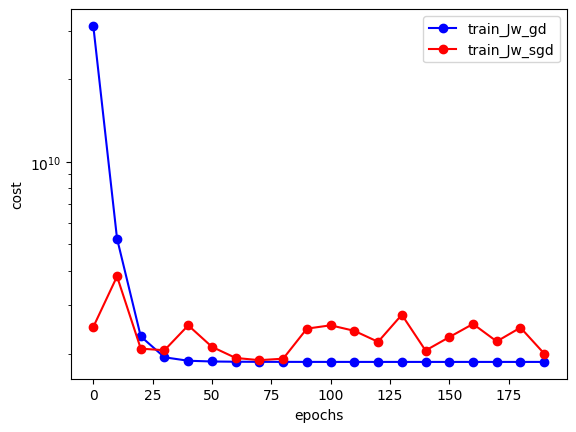

In [14]:
    # Plotting Epochs vs. cost for Gradient descent methods
    plt.xlabel('epochs')
    plt.ylabel('cost')
    plt.yscale('log')
    plt.plot(eph, costs, 'bo-', label='train_Jw_gd')
    plt.plot(eph_sgd, costs_sgd, 'ro-', label='train_Jw_sgd')
    plt.legend()
    plt.show()